In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15

In [2]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

In [3]:
#Question 2 A
c_regret = []
T = 100000
for path in range(30):
    loss = 0
    losses = np.zeros(10)
    net_losses = np.zeros(10)
    t_arr = np.arange(T)
    c_loss = np.zeros_like(t_arr, dtype=float)
    for t in range(T):
        i = np.argmin(net_losses)
        losses[:-2]   =  np.random.choice(2, size=8, p=[0.5, 0.5])
        losses[-2]    =  np.random.choice(2, p=[0.6,0.4])
        delta         =  0.1 if t<T/2 else -0.2
        losses[-1]    =  np.random.choice(2, p=[0.5-delta,0.5+delta])
        c_loss[t]     =  losses[i] + c_loss[t-1]
        net_losses    += losses
        pass
    c_regret.append(c_loss - t_arr*0.4)

In [4]:
c_regret = np.array(c_regret)
mean_r = np.ones_like(c_regret[0])
upper_r = np.ones_like(c_regret[0])
lower_r = np.ones_like(c_regret[0])
for i,regret in enumerate(c_regret.T):
    mean_r[i], lower_r[i], upper_r[i] = mean_confidence_interval(regret)

In [5]:
x1 = t_arr
y1 = mean_r
y1u = upper_r
y1l = lower_r

In [6]:
#Question 2 B
c_regret = []
T = 100000
eta = 2*np.sqrt(np.log(10)/T)
for path in range(30):
    loss = 0
    losses = np.zeros(10)
    net_losses = np.zeros(10)
    t_arr = np.arange(T)
    c_loss = np.zeros_like(t_arr, dtype=float)
    for t in range(T):
        w = np.exp(-eta*net_losses)
        w = w/np.sum(w)
        
        losses[:-2]   =  np.random.choice(2, size=8, p=[0.5, 0.5])
        losses[-2]    =  np.random.choice(2, p=[0.6,0.4])
        delta         =  0.1 if t<T/2 else -0.2
        losses[-1]    =  np.random.choice(2, p=[0.5-delta,0.5+delta])
        
        #import pdb; pdb.set_trace()
        c_loss[t]     =  np.sum(w*losses) + c_loss[t-1]
        net_losses    += losses
        pass
    c_regret.append(c_loss - t_arr*0.4)

In [7]:
c_regret = np.array(c_regret)
mean_r = np.ones_like(c_regret[0])
upper_r = np.ones_like(c_regret[0])
lower_r = np.ones_like(c_regret[0])
for i,regret in enumerate(c_regret.T):
    mean_r[i], lower_r[i], upper_r[i] = mean_confidence_interval(regret)

In [8]:
x2 = t_arr
y2 = mean_r
y2u = upper_r
y2l = lower_r

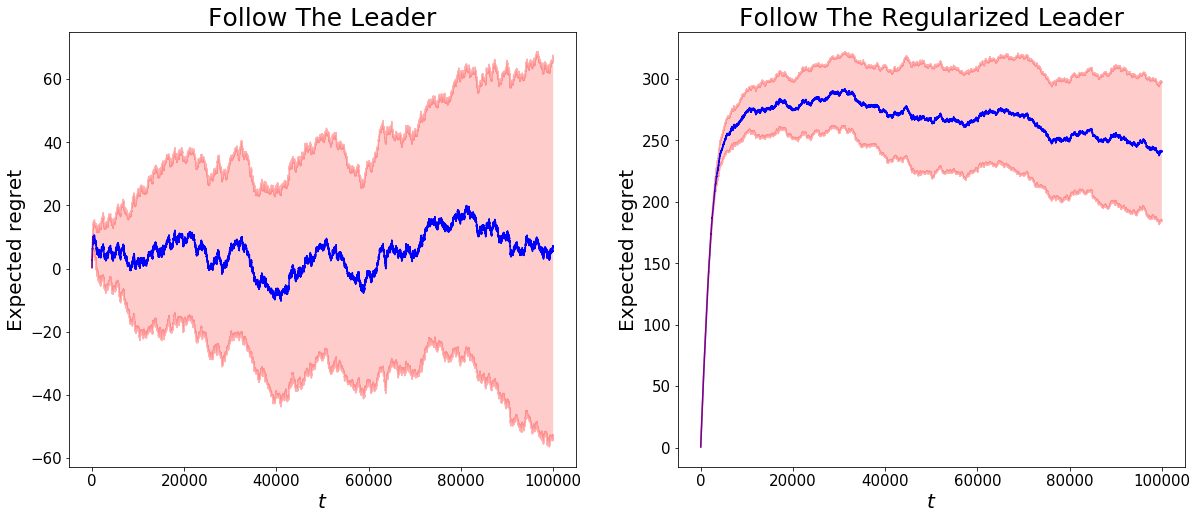

In [42]:
#Plotting
fig, axs = plt.subplots(1,2, figsize=(20,8))

def plot(ax,x,y,yu,yl):
    ax.plot(x,y,'b')
    ax.plot(x,yu,'r', alpha=0.3)
    ax.plot(x,yl,'r', alpha=0.3)
    ax.fill_between(x,y,yu, facecolor='red', alpha='0.2')
    ax.fill_between(x,yl,y, facecolor='red', alpha='0.2')
    ax.set_ylabel("Expected regret", fontsize=20)
    ax.set_xlabel("$t$", fontsize=20)

axs[0].set_title("Follow The Leader", fontsize=25)
axs[1].set_title("Follow The Regularized Leader", fontsize=25)
plot(axs[0], x1,y1,y1u,y1l)
plot(axs[1], x2,y2,y2u,y2l)
plt.savefig("q2.png")
#plt.tight_layout()
plt.show()

In [32]:
#Question 3
numpaths = 30
c_regrets = []
T = 10000
eta_s = np.sqrt(2*np.log(10)/T)
C = np.linspace(0.1,2.1,11)
for c in C:
    c_regret = []
    eta = c*eta_s
    for path in range(numpaths):
        loss = 0
        losses = np.zeros(10)
        net_losses = np.zeros(10)
        t_arr = np.arange(T)
        c_loss = 0.0
        for t in range(T):
            w = np.exp(-eta*net_losses)
            w = w/np.sum(w)

            losses[:-2]   =  np.random.choice(2, size=8, p=[0.5, 0.5])
            losses[-2]    =  np.random.choice(2, p=[0.6,0.4])
            delta         =  0.1 if t<T/2 else -0.2
            losses[-1]    =  np.random.choice(2, p=[0.5-delta,0.5+delta])

            #import pdb; pdb.set_trace()
            c_loss        =  np.sum(w*losses) + c_loss
            net_losses    += losses
            pass
        c_regret.append(c_loss - 0.4*T)
    c_regrets.append(c_regret)
c_regret = np.array(c_regrets).T

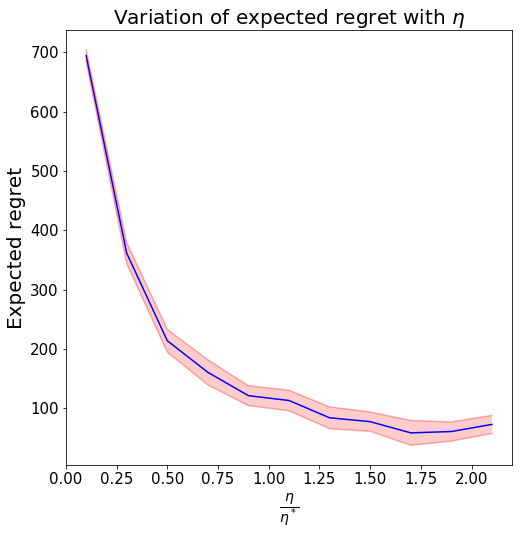

In [41]:
mean_r = np.ones_like(c_regret[0])
upper_r = np.ones_like(c_regret[0])
lower_r = np.ones_like(c_regret[0])
for i,regret in enumerate(c_regret.T):
    mean_r[i], lower_r[i], upper_r[i] = mean_confidence_interval(regret)

x3 = t_arr
y3 = mean_r
y3u = upper_r
y3l = lower_r

fig, ax = plt.subplots(figsize=(8,8))
plot(ax, C,y3,y3u,y3l)
ax.set_title("Variation of expected regret with $\eta$", fontsize=20)
ax.set_xlabel(r"$\frac{\eta}{\eta^*}$")
plt.savefig("q3.png")
plt.show()